In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = pd.read_csv('events.csv',low_memory=False)

In [3]:
visited = file.loc[file.event=='visited site']

In [4]:
visited['device_type'].value_counts()

Smartphone    44239
Computer      41790
Tablet         1234
Unknown         115
Name: device_type, dtype: int64

In [5]:
compras = file.loc[file.event=='conversion']

In [6]:
p = visited.groupby('person')

In [7]:
def disp (x):
    return ', '.join(sorted(x.device_type.unique()))
origen = p.apply(disp)

In [8]:
origen.value_counts()

Smartphone                      13967
Computer                        11768
Computer, Smartphone              625
Tablet                            467
Unknown                            40
Computer, Tablet                   11
Smartphone, Tablet                 11
Computer, Smartphone, Tablet        6
Computer, Unknown                   3
Smartphone, Unknown                 1
dtype: int64

In [9]:
i = origen.reset_index()

In [10]:
i.head()

,person,0
0,0004b0a2,Smartphone
1,0006a21a,Smartphone
2,000a54b2,Computer
3,00184bf9,Computer
4,0019c395,Smartphone


In [11]:
i['compro'] = i['person'].isin(compras['person'])

In [12]:
i.head()

,person,0,compro
0,0004b0a2,Smartphone,False
1,0006a21a,Smartphone,False
2,000a54b2,Computer,False
3,00184bf9,Computer,False
4,0019c395,Smartphone,False


In [13]:
c = i.groupby(0).agg({'compro':'sum'}).sort_values('compro',ascending=False)

In [14]:
c

,compro
0,
Computer,263.0
"Computer, Smartphone",193.0
Smartphone,166.0
"Smartphone, Tablet",3.0
"Computer, Tablet",2.0
Tablet,2.0
"Computer, Smartphone, Tablet",1.0
"Computer, Unknown",1.0
"Smartphone, Unknown",0.0


Text(0.5,1,'Cantidad de personas que compraron segun dispositivos utilizados para ingresar')

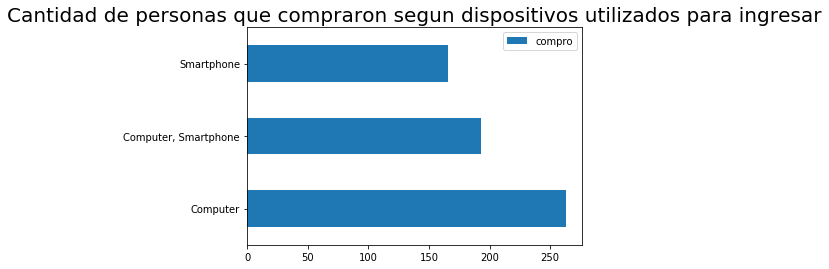

In [15]:
g = (c.head(3)).plot.barh()
g.set_ylabel('')
g.set_title('Cantidad de personas que compraron segun dispositivos utilizados para ingresar',size=20)

# Visitas segun canal (hay que hacer mejor grafico)

In [29]:
visited_filtered = visited.loc[visited['device_type'].isin(['Computer','Smartphone'])]
channels = visited_filtered.groupby('device_type').apply(lambda x: pd.Series(x['channel'].value_counts()))

In [30]:
channels

device_type          
Computer     Paid        20827
             Direct      10602
             Organic      5842
             Referral     4232
             Social        251
             Email          27
             Unknown         9
Smartphone   Paid        22581
             Direct       7754
             Referral     6928
             Organic      6349
             Social        578
             Email          49
Name: channel, dtype: int64

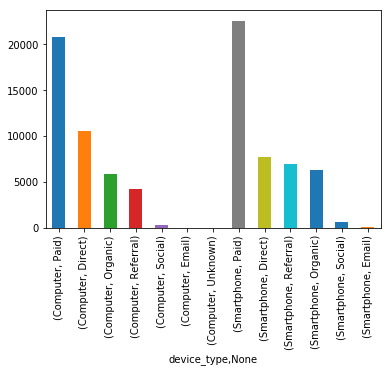

In [31]:
channels.plot.bar()